<a href="https://colab.research.google.com/github/HaiderAliSaeed/CE888_Lab/blob/main/All%20Labs/Lab_6/Task%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 7: To complete this task, please create a new notebook in Google Colab.**

In [ ]:
import pandas as pd# Load the fuel-sourced energy dataset

data1 = pd.read_csv('/content/Country-data.csv')

data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data1.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X_transformed = scaler.fit_transform(data1[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].values)
X_transformed

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

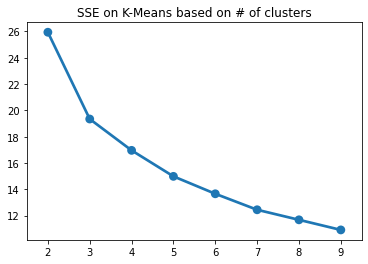

In [ ]:
from sklearn.cluster import KMeans # To make sure our work becomes reproducible
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
inertia = [] # Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

In [ ]:
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=3)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
data1['cluster'] = cluster
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
for i in range(3):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(data1[data1['cluster'] == i]['country'].values)))
    print("Total Members:", len(list(data1[data1['cluster'] == i]['country'].values)))
    print()

Cluster: 0
The Members: Afghanistan | Angola | Benin | Burkina Faso | Burundi | Cameroon | Central African Republic | Chad | Comoros | Congo, Dem. Rep. | Congo, Rep. | Cote d'Ivoire | Equatorial Guinea | Eritrea | Gabon | Gambia | Ghana | Guinea | Guinea-Bissau | Haiti | Iraq | Kenya | Kiribati | Lao | Lesotho | Liberia | Madagascar | Malawi | Mali | Mauritania | Mozambique | Namibia | Niger | Nigeria | Pakistan | Rwanda | Senegal | Sierra Leone | Solomon Islands | Sudan | Tanzania | Timor-Leste | Togo | Uganda | Yemen | Zambia
Total Members: 46

Cluster: 1
The Members: Albania | Algeria | Antigua and Barbuda | Argentina | Armenia | Azerbaijan | Bahamas | Bahrain | Bangladesh | Barbados | Belarus | Belize | Bhutan | Bolivia | Bosnia and Herzegovina | Botswana | Brazil | Bulgaria | Cambodia | Cape Verde | Chile | China | Colombia | Costa Rica | Croatia | Dominican Republic | Ecuador | Egypt | El Salvador | Estonia | Fiji | Georgia | Grenada | Guatemala | Guyana | Hungary | India | Indon